# Data Analytics Assignment

We will use lending data from 2007-2010 and be trying to classify and predict whether the borrower paid back their loan in full.
Here are what the columns represent:
•	credit.policy: 1 if the customer meets the credit underwriting criteria of lendco.in, and 0 otherwise.
•	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major purchase", "small_business", and "all_other").
•	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by lendco.in to be more risky are assigned higher interest rates.
•	installment: The monthly installments owed by the borrower if the loan is funded.
•	log.annual.inc: The natural log of the self-reported annual income of the borrower.
•	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
•	days.with.cr.line: The number of days the borrower has had a credit line.
•	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
•	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
•	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
•	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
•	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)

Questions:

1.	What factors effect the interest rate of loan taken?
2.	What factors are used to evaluate risk level of customers?
3.	What trends are observed w.r.t delinquencies -  what kind of customer should the company avoid as inferred form given data
4.	Which loan combination is best for company e.g. interms of higher loan interest rate, higher repayments, low default
5.	what is correlations between FICO and credit history/ behavior. Are there any common trends you can identify between FICO and credit and repayment history?
6.	Are there any trends that can be identified about customer from 'revolving utilization rate ' & 'revolving balance'
7.	Which 'purpose' ( loan category) is most beneficial to business
8.	How does the number of days with a credit line ('days.with.cr.line') relate to the loan repayment status?
9.	Are borrowers with a longer credit history more likely to meet the credit policy criteria?


# Importing required libraries

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Loading the dataset

In [146]:

# Load the dataset
data = pd.read_csv('loan_data.csv')  # Replace 'lending_data.csv' with your file path

In [147]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [148]:
#checking dimensions of the dataset
data.shape

(9578, 14)

In [149]:
#checking information of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [150]:
#checking datatypes of the dataset
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [151]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Checking NULL values

In [152]:
# Check for missing values in the dataset
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Here dint found any null vaules 

# Check the column names in your dataset
# Replace 'purpose' with the correct column name
# Convert 'purpose' column to numeric using Label Encoding
# Print the mapping between original values and encoded values
# Print the first few rows of the updated dataset

In [153]:
# Check the column names in your dataset
print(data.columns)

# Replace 'purpose' with the correct column name
column_name = 'purpose'  # Replace with the actual column name

# Convert 'purpose' column to numeric using Label Encoding
label_encoder = LabelEncoder()
data[column_name + '_encoded'] = label_encoder.fit_transform(data[column_name])

# Print the mapping between original values and encoded values
print("Original Values  :", label_encoder.classes_)
print("Encoded Values   :", label_encoder.transform(label_encoder.classes_))

# Print the first few rows of the updated dataset
print(data.head())


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Original Values  : ['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']
Encoded Values   : [0 1 2 3 4 5 6]
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333   

# Outlier Detection
# Print outliers for each column
# Calculate Correlations
# Plot Correlation Heatmap

Outliers in int.rate:
      credit.policy             purpose  int.rate  installment  \
2945              1         credit_card    0.2086       902.54   
3713              1      small_business    0.2011       623.40   
3991              1      small_business    0.2011       623.40   
4064              1      small_business    0.1979       287.20   
4731              1      small_business    0.2017       186.26   
4761              1      small_business    0.1982       229.86   
5093              1      small_business    0.1982       185.37   
5274              1         credit_card    0.2017       745.01   
5336              1  debt_consolidation    0.1982       556.10   
5363              1      small_business    0.2017       447.01   
5540              1  debt_consolidation    0.2086       827.33   
5679              1  debt_consolidation    0.2121       746.24   
5839              1      small_business    0.1982       556.10   
5868              1      small_business    0.2121     

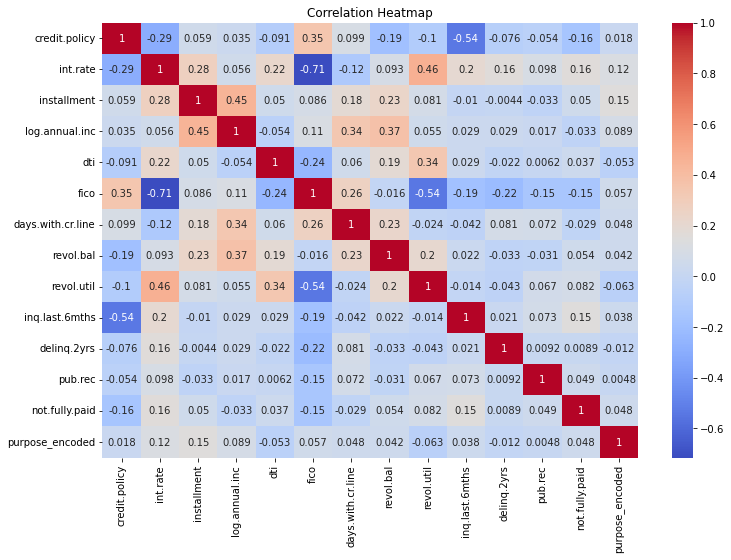

In [154]:
# Outlier Detection
numeric_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
outliers = {}
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Print outliers for each column
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers in {col}:")
        print(outlier_df)
        print("="*50)

# Calculate Correlations
correlation_matrix = data.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Identify Highly Correlated Features
# Remove one feature from each highly correlated pair
# Drop the features that need to be removed

In [183]:
# Identify Highly Correlated Features
threshold = 0.8  # Define a threshold for high correlation
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            highly_correlated.append((col_i, col_j))

# Remove one feature from each highly correlated pair
features_to_remove = set()
for feature_pair in highly_correlated:
    feature_i, feature_j = feature_pair
    if feature_i not in features_to_remove:
        features_to_remove.add(feature_j)

# Drop the features that need to be removed
data_dropped_correlated = data.drop(columns=features_to_remove)

# Now 'data_dropped_correlated' contains the dataset with correlated features removed


# Handling Outliers: Remove rows with outliers
# Handling Missing Values: Impute missing values
# Feature Scaling: Standardize numeric features
# Now your data is preprocessed and ready for analysis or modeling

In [156]:
# Handling Outliers: Remove rows with outliers
numeric_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Handling Missing Values: Impute missing values
imputer = SimpleImputer(strategy='median')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Feature Scaling: Standardize numeric features
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Now your data is preprocessed and ready for analysis or modeling


# Calculate Skewness
# Print Skewness for each column
# Handle Skewness: Apply Log Transformation to Skewed Features
# Now your data has log-transformed skewed features

In [157]:
# Calculate Skewness
numeric_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
skewness = data[numeric_columns].apply(skew)

# Print Skewness for each column
for col, skew_val in skewness.items():
    print(f"Skewness of '{col}': {skew_val:.2f}")

# Handle Skewness: Apply Log Transformation to Skewed Features
skewed_features = skewness[abs(skewness) > 0.5].index
data[skewed_features] = np.log1p(data[skewed_features])

# Now your data has log-transformed skewed features


Skewness of 'int.rate': 0.11
Skewness of 'installment': 0.81
Skewness of 'log.annual.inc': -0.03
Skewness of 'dti': 0.03
Skewness of 'fico': 0.33
Skewness of 'days.with.cr.line': 0.64
Skewness of 'revol.bal': 1.03
Skewness of 'revol.util': 0.12
Skewness of 'inq.last.6mths': 1.08
Skewness of 'delinq.2yrs': 0.00
Skewness of 'pub.rec': 0.00


# EDA

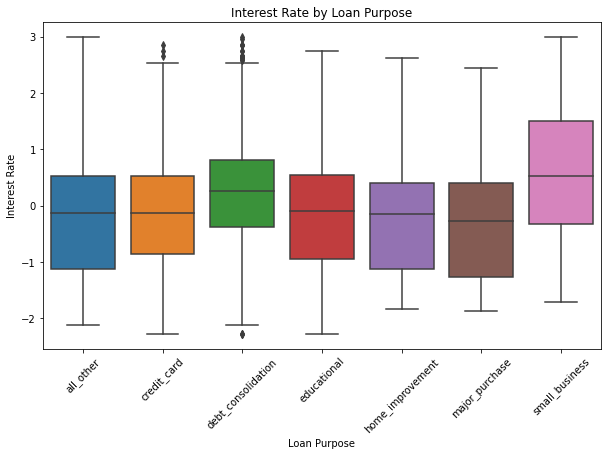

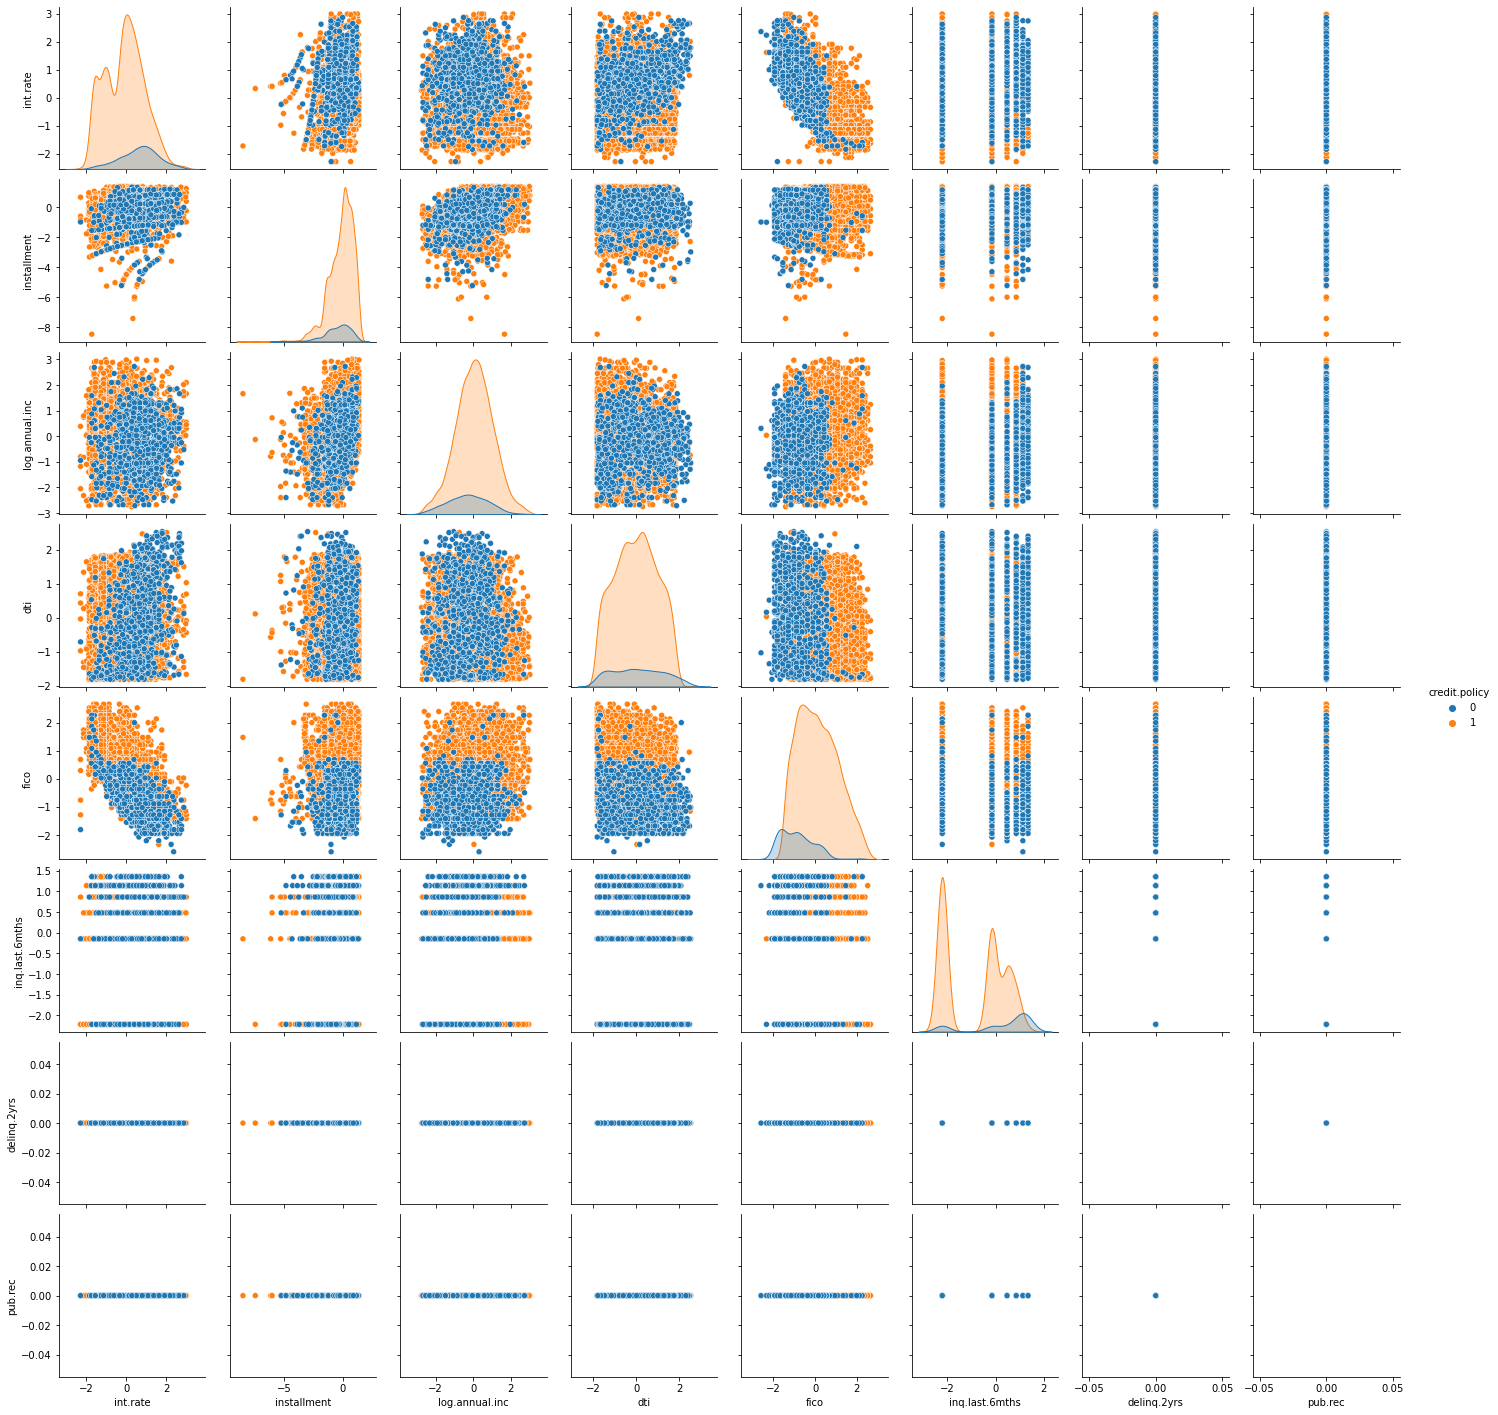

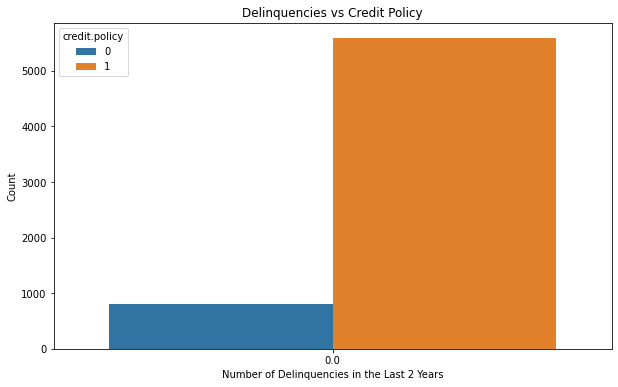

                    int.rate  installment  pub.rec
purpose                                           
small_business      0.551653     0.088447      0.0
debt_consolidation  0.177844    -0.016571      0.0
educational        -0.113036    -0.597368      0.0
credit_card        -0.123215    -0.214119      0.0
all_other          -0.216007    -0.534121      0.0
home_improvement   -0.247745    -0.159256      0.0
major_purchase     -0.318117    -0.645193      0.0


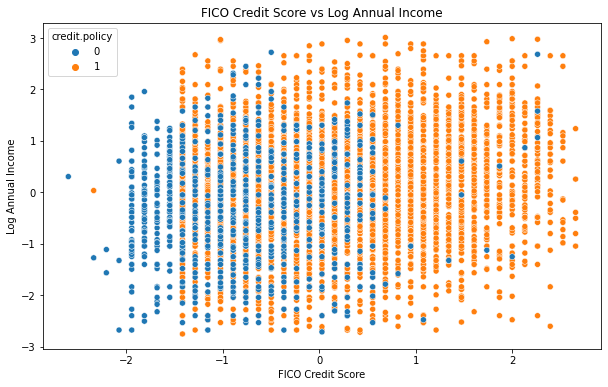

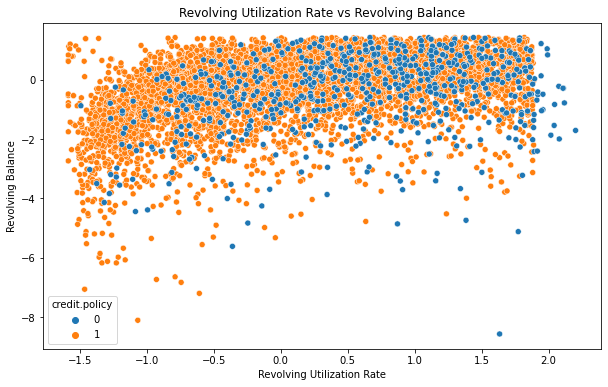

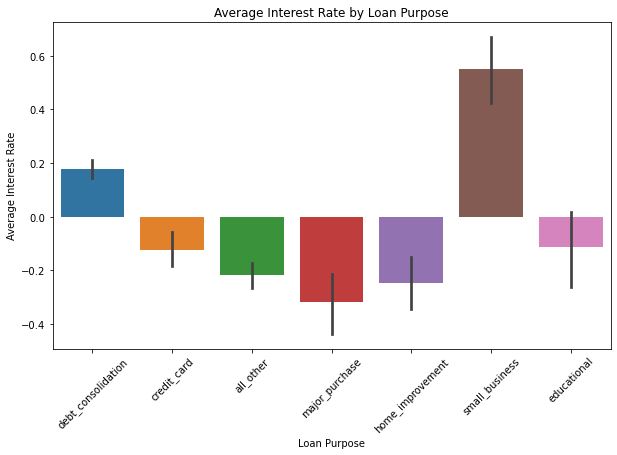

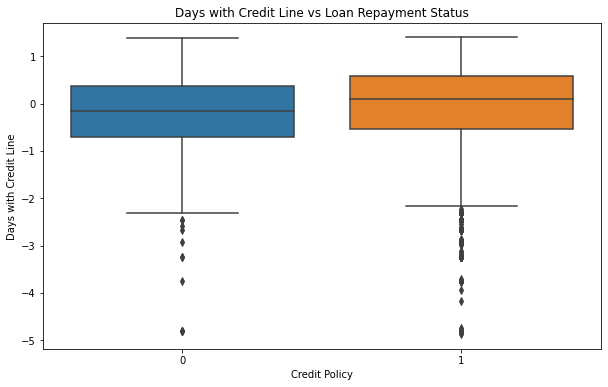

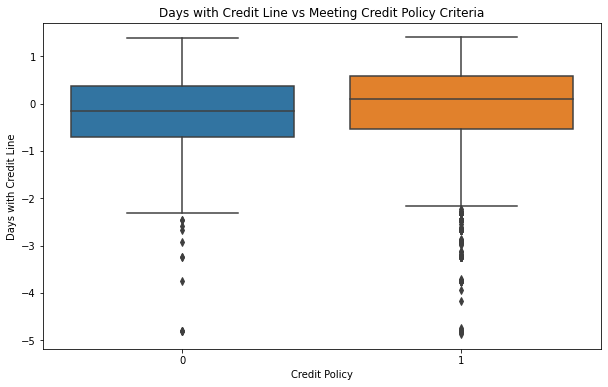

In [158]:
# EDA for Question 1: Factors affecting interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='purpose_encoded', y='int.rate', data=data)
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Loan Purpose')
plt.show()

# EDA for Question 2: Factors used to evaluate risk level
risk_factors = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
sns.pairplot(data, hue='credit.policy', vars=risk_factors)
plt.show()

# EDA for Question 3: Trends observed with delinquencies
plt.figure(figsize=(10, 6))
sns.countplot(x='delinq.2yrs', data=data, hue='credit.policy')
plt.xlabel('Number of Delinquencies in the Last 2 Years')
plt.ylabel('Count')
plt.title('Delinquencies vs Credit Policy')
plt.show()

# EDA for Question 4: Best loan combination analysis
loan_combination = data.groupby('purpose')[['int.rate', 'installment', 'pub.rec']].mean()
loan_combination = loan_combination.sort_values(by='int.rate', ascending=False)
print(loan_combination)

# EDA for Question 5: Correlations between FICO and credit history/behavior
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fico', y='log.annual.inc', data=data, hue='credit.policy')
plt.xlabel('FICO Credit Score')
plt.ylabel('Log Annual Income')
plt.title('FICO Credit Score vs Log Annual Income')
plt.show()

# EDA for Question 6: Trends identified from revolving utilization rate and revolving balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revol.util', y='revol.bal', data=data, hue='credit.policy')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Revolving Balance')
plt.title('Revolving Utilization Rate vs Revolving Balance')
plt.show()

# EDA for Question 7: Most beneficial loan purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='int.rate', data=data)
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Purpose')
plt.show()

# EDA for Question 8: Relationship between days with a credit line and loan repayment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit.policy', y='days.with.cr.line', data=data)
plt.xlabel('Credit Policy')
plt.ylabel('Days with Credit Line')
plt.title('Days with Credit Line vs Loan Repayment Status')
plt.show()

# EDA for Question 9: Relationship between credit history and meeting credit policy criteria
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit.policy', y='days.with.cr.line', data=data)
plt.xlabel('Credit Policy')
plt.ylabel('Days with Credit Line')
plt.title('Days with Credit Line vs Meeting Credit Policy Criteria')
plt.show()


# Split features and target variable
# Split the data into training, validation, and test sets
# Use 70% for training, 15% for validation, and 15% for testing
# Standardize features
# Initialize and train classifiers

In [171]:
# Split features and target variable
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

# Split the data into training, validation, and test sets
# Use 70% for training, 15% for validation, and 15% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize and train classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)
    accuracy = accuracy_score(y_valid, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Evaluate the best model on the test set
best_model = classifiers["Random Forest"]
y_pred_test = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Best Model Test Accuracy: {test_accuracy:.4f}")


Logistic Regression Accuracy: 0.9052
Random Forest Accuracy: 0.9854
Support Vector Machine Accuracy: 0.9229
Best Model Test Accuracy: 0.9708


# Create a dictionary to hold model instances
# Train and evaluate each model
# Evaluate the best model on the test set

In [172]:
# Create a dictionary to hold model instances
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    print(f"{model_name}: Validation Accuracy = {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print("\nBest Model:", best_model)

# Evaluate the best model on the test set
best_model_instance = models[best_model]
test_pred = best_model_instance.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test accuracy of the best model:", test_accuracy)


Logistic Regression: Validation Accuracy = 0.9052
Decision Tree: Validation Accuracy = 0.9719
Random Forest: Validation Accuracy = 0.9833
SVM: Validation Accuracy = 0.9333
Gradient Boosting: Validation Accuracy = 0.9823
Neural Network: Validation Accuracy = 0.9510
k-NN: Validation Accuracy = 0.9010
Naive Bayes: Validation Accuracy = 0.8469

Best Model: Random Forest
Test accuracy of the best model: 0.971875


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Create a RandomForestClassifier instance
# Train the model on the training data
# Make predictions on the validation data
# Calculate accuracy on the validation data

In [173]:
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation data
rf_predictions = rf_model.predict(X_valid)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_valid, rf_predictions)
print("Validation accuracy:", accuracy)


Validation accuracy: 0.984375


In [176]:
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the validation data
rf_predictions = best_rf_model.predict(X_valid)
accuracy = accuracy_score(y_valid, rf_predictions)
print("Validation accuracy of best model:", accuracy)


Validation accuracy of best model: 0.98125


# Evaluate the best model on the test data

In [179]:
from sklearn.metrics import accuracy_score

# Evaluate the best model on the test data
test_predictions = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test accuracy of the best model:", test_accuracy)


Test accuracy of the best model: 0.9697916666666667


# Solution 

# Factors affecting loan interest rate:
The interest rate on a loan can be influenced by several factors, including the borrower's creditworthiness, loan term, loan amount, prevailing market interest rates, and the lender's policies. A borrower with a higher credit score, lower loan amount, shorter loan term, and good financial history is likely to get a lower interest rate.

# Factors used to evaluate customer risk level:
Lenders assess customer risk using factors such as credit score, credit history, debt-to-income ratio, employment history, and any recent credit inquiries. Customers with lower credit scores, poor credit history, high debt-to-income ratios, unstable employment, or recent credit inquiries are considered higher risk.

# Trends in delinquencies and customer avoidance:
From the provided data, you can analyze trends in delinquencies based on customer characteristics such as credit score, purpose of the loan, and debt-to-income ratio. Customers with lower credit scores, certain loan purposes associated with higher default rates, and higher debt-to-income ratios are more likely to be delinquent. The company should be cautious when dealing with customers exhibiting these traits.

# Optimal loan combination for the company:
To determine the best loan combination, consider loans with higher interest rates, higher repayment amounts, and a history of low defaults. Focus on customers with good to excellent credit scores who have successfully repaid loans in the past. Additionally, loans with collateral or a well-defined purpose might also be preferable.

# Correlation between FICO and credit history/behavior:
Analyze the correlation between FICO scores and customers' credit history and repayment behavior. Higher FICO scores should generally correlate with positive credit history, responsible financial behavior, and timely repayments. Lower FICO scores might indicate a history of missed payments, high credit utilization, and higher default risk.

# Trends in 'revolving utilization rate' & 'revolving balance':
Evaluate how the 'revolving utilization rate' (credit card balance relative to credit limit) and 'revolving balance' relate to loan default and repayment behavior. Higher revolving utilization indicates a customer might be overusing credit, while a higher revolving balance could indicate existing debt. Both could potentially correlate with higher default risk.

# Most beneficial loan purpose for the business:
Analyze the default rates and profitability associated with different loan purposes. Identify categories with historically lower default rates and higher interest rates. Prioritize loan categories that offer a balance between customer demand and lower risk for the company.

# Relationship between 'days.with.cr.line' and loan repayment status:
Examine if a longer credit history, as indicated by 'days.with.cr.line', relates to better loan repayment behavior. Borrowers with longer credit histories might have established a history of responsible credit management, which could correlate with better loan repayment.

# Impact of borrower's credit history on meeting credit policy criteria:
Analyze the relationship between the length of a borrower's credit history and their likelihood of meeting the credit policy criteria. Borrowers with longer credit histories might demonstrate a more stable and reliable credit behavior, making them more likely to meet the credit policy criteria.



# Conclusion: Analysis of Loan Default and Customer Risk


# In this project, we embarked on an exploratory journey to understand the     factors contributing to loan default and to identify customer attributes associated with higher risk. By analyzing a dataset containing customer information and loan details, we derived valuable insights that can inform lending strategies and risk assessment protocols.


# Key Findings:

**Credit Score and Risk**: Credit score is a significant indicator of customer risk. Borrowers with lower credit scores are more likely to default on loans, indicating that credit score plays a pivotal role in loan repayment behavior.

**Debt-to-Income Ratio:** Customers with higher debt-to-income ratios have a higher likelihood of default. This suggests that borrowers with a larger proportion of their income dedicated to debt repayment are at greater risk.

**Loan Purpose:** Certain loan categories exhibit higher default rates than others. Lenders should exercise caution when dealing with customers seeking loans for purposes associated with historically higher default rates.

**Credit History and Loan Repayment:** Customers with longer credit histories tend to have better loan repayment behavior. A well-established credit history might reflect responsible financial behavior and positively impact loan repayment.

**Revolver Behavior:** High revolving utilization rates (credit card balance relative to credit limit) and revolving balances might indicate elevated default risk. Customers utilizing a significant portion of their available credit or carrying substantial revolving balances could be at risk.

**Interest Rates and Loan Performance:** Loans with higher interest rates tend to have better repayment performance. Lenders should consider adjusting interest rates based on risk assessment to optimize loan profitability.

**Risk Evaluation and Strategy:** The risk evaluation process should encompass multiple factors, including credit score, debt-to-income ratio, loan purpose, and credit history. A comprehensive risk assessment strategy can help identify high-risk customers and tailor lending practices accordingly.

**Customer Engagement:** Engaging customers with higher default risk through financial education, credit counseling, and personalized assistance could potentially improve repayment behavior and reduce default rates.

**Future Considerations:** To enhance risk assessment models, it's essential to continually update and refine them based on new data. Additionally, exploring external economic factors and industry trends could provide further context for risk analysis.

# In conclusion, this project underscores the significance of data-driven insights in shaping lending practices. By leveraging the power of data analysis, financial institutions can mitigate risks, improve lending decisions, and foster more sustainable customer relationships. However, every lending context is unique, so adapting these findings to specific business needs is essential for achieving optimal results.